In [1]:
#@title Get Tensorflow
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
#@title Defining plot-curve and importing necessities
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

np.set_printoptions(linewidth = 200)

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

11493376/11490434 [==============================] - 0s 0us/step
Loaded the plot_curve function.


In [38]:
#@title Defining the model creation
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

#first layer
  model.add(tf.keras.layers.Dense(units= 65, activation= 'relu'))
   
#second layer
  model.add(tf.keras.layers.Dense(units= 35 , activation = 'relu'))

#third layer
  model.add(tf.keras.layers.Dense(units= 27 , activation = 'relu'))


  model.add(tf.keras.layers.Dropout(rate=0.2))


  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                             
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/50
12/12 [==============================] - 1s 59ms/step - loss: 1.9050 - accuracy: 0.3374 - val_loss: 0.6344 - val_accuracy: 0.8269
Epoch 2/50
12/12 [==============================] - 1s 43ms/step - loss: 0.7322 - accuracy: 0.7629 - val_loss: 0.3690 - val_accuracy: 0.8945
Epoch 3/50
12/12 [==============================] - 1s 45ms/step - loss: 0.4572 - accuracy: 0.8651 - val_loss: 0.2768 - val_accuracy: 0.9199
Epoch 4/50
12/12 [==============================] - 1s 42ms/step - loss: 0.3519 - accuracy: 0.8989 - val_loss: 0.2356 - val_accuracy: 0.9307
Epoch 5/50
12/12 [==============================] - 1s 44ms/step - loss: 0.2903 - accuracy: 0.9183 - val_loss: 0.2116 - val_accuracy: 0.9375
Epoch 6/50
12/12 [==============================] - 1s 42ms/step - loss: 0.2423 - accuracy: 0.9307 - val_loss: 0.1898 - val_accuracy: 0.9441
Epoch 7/50
12/12 [==============================] - 1s 43ms/step - loss: 0.2210 - accuracy: 0.9365 - val_loss: 0.1786 - val_accuracy: 0.9472
Epoch 8/50
12

[0.14358186721801758, 0.9699000120162964]

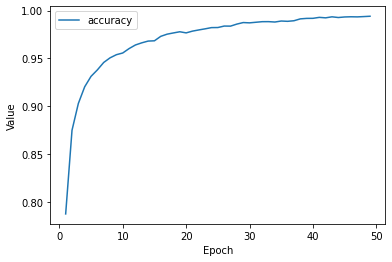

In [40]:
#@title training the model
# The following variables are the hyperparameters.
learning_rate = 0.005
epochs = 50
batch_size = 4000
validation_split = 0.25

my_model = create_model(learning_rate)

epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)